In [1]:
import sympy as sy
from sympy.physics.quantum import TensorProduct
import numpy as np
from sympy.physics.quantum.dagger import Dagger

In [2]:
C = sy.Matrix([1,0])
D = sy.Matrix([0,1])

j = C*sy.Matrix([1,0]).T
k = D*sy.Matrix([0,1]).T

i = sy.eye(2)
x = sy.Matrix([[0,1],[1,0]])
z = sy.Matrix([[1,0],[0,-1]])

Neste notebook foi utilizada a package *sympy*, para verificar os cálculos e o circuito implementado no artigo.

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
Segundo [2], $J$ é a solução das condições de comutação, que permitem reproduzir o jogo clássico do Prisioner's Dilemma.
$$J = e^{i \gamma X\otimes X/2}$$
Por inspeção da equação anterior, obtemos uma solução análoga para o Diner's Dilemma:
$$J = e^{i \gamma X\otimes X \otimes X \otimes X /2}$$
Onde $\gamma$ é o parametro de entrelaçamento.

In [3]:
gamma = sy.Symbol('\gamma')
E = sy.Matrix([[0,1],[-1,0]])
J = sy.exp(1j*gamma*TensorProduct(x,x,x,x)/2)
sy.nsimplify(sy.simplify(J),tolerance=0.001, rational=True)

Matrix([
[  cos(\gamma/2),               0,               0,               0,               0,               0,               0,               0,               0,               0,               0,               0,               0,               0,               0, I*sin(\gamma/2)],
[              0,   cos(\gamma/2),               0,               0,               0,               0,               0,               0,               0,               0,               0,               0,               0,               0, I*sin(\gamma/2),               0],
[              0,               0,   cos(\gamma/2),               0,               0,               0,               0,               0,               0,               0,               0,               0,               0, I*sin(\gamma/2),               0,               0],
[              0,               0,               0,   cos(\gamma/2),               0,               0,               0,               0,               0,               0

In [4]:
#Pode ser mostrado por equivalencia
#sy.cos(gamma/2)*TensorProduct(i,i,i,i) + 1j* sy.sin(gamma/2)*TensorProduct(x,x,x,x)

Por solução analítica:
$$J = e^{i \gamma X\otimes X \otimes X\otimes X /2} = \cos(\frac{\gamma}{2})I\otimes I\otimes I\otimes I + i\sin(\frac{\gamma}{2})X \otimes X\otimes X\otimes X$$ 

Quando for aplicado o operador J ao estado inicial, será obtido então o estado:
$$J\ket{CCCC} = \cos(\frac{\gamma}{2})\ket{CCCC} + i\sin(\frac{\gamma}{2})\ket{EEEE} $$ 

In [5]:
r = sy.simplify(J * TensorProduct(C,C,C,C))
sy.nsimplify(r,tolerance=0.001, rational=True)

Matrix([
[  cos(\gamma/2)],
[              0],
[              0],
[              0],
[              0],
[              0],
[              0],
[              0],
[              0],
[              0],
[              0],
[              0],
[              0],
[              0],
[              0],
[I*sin(\gamma/2)]])

A situação relevante para o problema é quando $\gamma = \frac{\pi}{2}$, assim o estado se encontra maximamente entrelaçado.

### Estado desejado
<a id='c1'></a>

In [6]:
sy.simplify(r.subs(gamma,sy.pi/2),rational=True)

Matrix([
[  sqrt(2)/2],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[sqrt(2)*I/2]])

No artigo [1], é apresentado o circuito seguinte que implementa a operação 
$$J\dagger (U_A \otimes U_B \otimes U_C \otimes U_D)J \ket{\psi_0}$$
para construir o circuito que aplica $J$, foi utilizada uma sequência de *gates* $CX$, $CZ$ e rotação $U$.

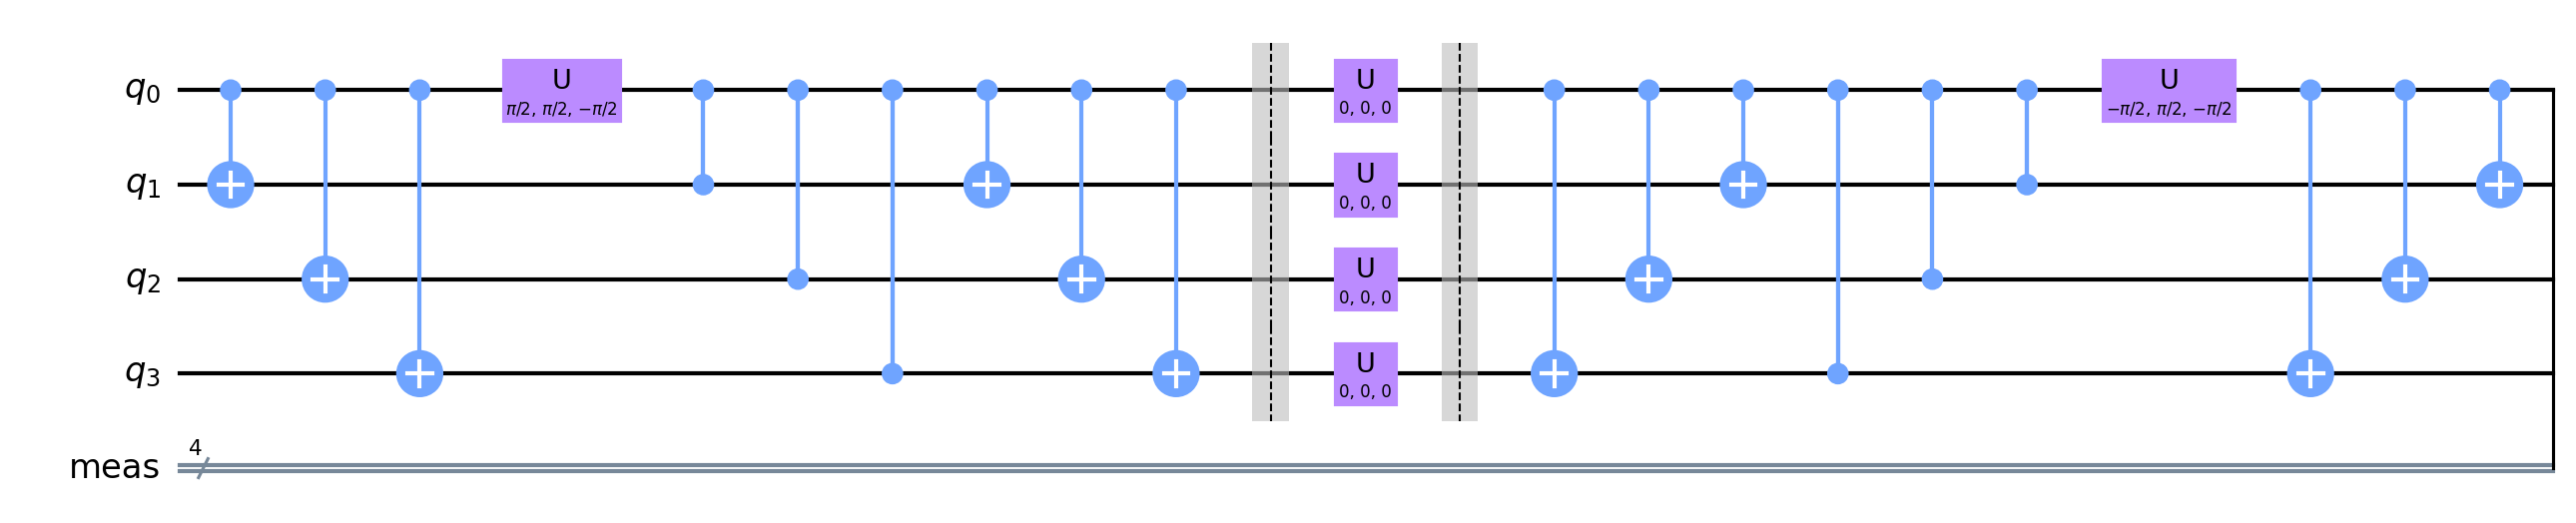

# Controlled-X gates

Uma gate $CX$ para um sistema de 2 *qubits*, aplica a seguinte operação:
$$CX = \ket{0}\bra{0}\otimes I + \ket{1}\bra{1}\otimes X $$
Isto é, quando o primeiro *qubit* se apresenta no estado $\ket{1}$ é aplicada uma *gate* $X$ ao segundo *qubit*, caso contrário
não é aplicada.

Desta forma, para construir o modelo matemático das *gates* $CX$ num espaço com mais de 2 *qubits*, aplicasse a mesma lógica, como por exemplo a seguir:
$$CX_{q_0,q_3} =\ket{0}\bra{0}\otimes I \otimes I \otimes I + \ket{1}\bra{1}\otimes I \otimes I \otimes X $$  
Esta *gate* tem como controlo o *qubit* 0 e alvo o *qubit* 3, e não opera sob os restantes

In [7]:
c1 = TensorProduct(j, i,i,i) + TensorProduct(k, x , i ,i ) 
c2 = TensorProduct(j, i,i,i) + TensorProduct(k, i , x ,i )
c3 = TensorProduct(j, i,i,i) + TensorProduct(k, i , i ,x )

# $U$ gate

Para rotação U, é utilizada a *gate* $U3$ que segundo o *Qiskit* aplica a seguinte operação:
$$U3(\theta,\phi,\lambda) = \begin{bmatrix} \cos{\frac{\theta}{2}} & -e^{i\lambda}\sin{\frac{\theta}{2}}  \\ e^{i\phi}\sin{\frac{\theta}{2}} & e^{i(\phi+\lambda)}\cos{\frac{\theta}{2}}   \end{bmatrix}$$

Para o efeito de obter $J$ foram usados os seguintes ângulos:
$$\theta = \phi =-\lambda =\frac{\pi}{2}$$

E como a gate é aplicada apenas a $q_0$ fica:
$$U = U3(\theta,\phi,\lambda) \otimes I \otimes I \otimes I$$


In [8]:
a,b,c = sy.pi/2 , sy.pi/2 ,-sy.pi/2
u3 = sy.Matrix([[sy.cos(a/2), -sy.exp(1j*c)*sy.sin(a/2)],[sy.exp(1j*b)*sy.sin(a/2),sy.exp(1j*(b+c))*sy.cos(a/2)]])
u = TensorProduct(u3, i , i ,i )

# Controlled-Z gates

Pela mesma lógica, utilizada para as *gates* $CX$:
$$CZ = \ket{0}\bra{0}\otimes I + \ket{1}\bra{1}\otimes Z $$

$$CZ_{q_0,q_3} =\ket{0}\bra{0}\otimes I \otimes I \otimes I + \ket{1}\bra{1}\otimes I \otimes I \otimes Z $$  

In [9]:
cz1 = TensorProduct(j, i,i,i) + TensorProduct(k, z , i ,i ) 
cz2 = TensorProduct(j, i,i,i) + TensorProduct(k, i , z ,i )  
cz3 = TensorProduct(j, i,i,i) + TensorProduct(k, i , i ,z )  

# $J$

Finalmente, o operador $J$ será dado por:

$$ J = CX_{q_0,q_3}\cdot CX_{q_0,q_2}\cdot CX_{q_0,q_1} \cdot CZ_{q_0,q_3} \cdot CZ_{q_0,q_2} \cdot CZ_{q_0,q_1}\cdot U \cdot CX_{q_0,q_3}\cdot CX_{q_0,q_2}\cdot CX_{q_0,q_1} $$

In [10]:
J = c3*c2*c1*cz3*cz2*cz1*u*c3*c2*c1
sy.simplify(J)

Matrix([
[  sqrt(2)/2,            0,            0,           0,            0,           0,           0,            0,           0,           0,           0,           0,           0,           0,           0, sqrt(2)*I/2],
[          0,    sqrt(2)/2,            0,           0,            0,           0,           0,            0,           0,           0,           0,           0,           0,           0, sqrt(2)*I/2,           0],
[          0,            0,    sqrt(2)/2,           0,            0,           0,           0,            0,           0,           0,           0,           0,           0, sqrt(2)*I/2,           0,           0],
[          0,            0,            0,   sqrt(2)/2,            0,           0,           0,            0,           0,           0,           0,           0, sqrt(2)*I/2,           0,           0,           0],
[          0,            0,            0,           0,    sqrt(2)/2,           0,           0,            0,           0,           0, 

Para provar que o circuito irá funcionar, aplicamos o operador obtido ao estado inicial.
$$J\ket{CCCC} = \frac{1}{\sqrt 2} (\ket{CCCC} + i \ket{EEEE})$$

In [11]:
CCCC = TensorProduct(C,C,C,C)
sy.simplify(J*CCCC)

Matrix([
[  sqrt(2)/2],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[sqrt(2)*I/2]])

E observamos que, de facto, obtemos o mesmo estado que na célula [Estado desejado](#c1). 

Logo provámos que o circuito implementa $J$.

# $J^†$
Para transpor um circuito quântico, basta reverter a ordem em que é aplicada as *gates* quânticas, e ter em conta as rotações que os operadores aplicam:

$$
\begin{align}
J^\dagger & = (CX_{q_0,q_3}\cdot CX_{q_0,q_2}\cdot CX_{q_0,q_1} \cdot CZ_{q_0,q_3} \cdot CZ_{q_0,q_2} \cdot CZ_{q_0,q_1}\cdot U \cdot CX_{q_0,q_3}\cdot CX_{q_0,q_2}\cdot CX_{q_0,q_1})^\dagger \\
& = CX_{q_0,q_1} \cdot CX_{q_0,q_2} \cdot CX_{q_0,q_3} \cdot U^\dagger \cdot CZ_{q_0,q_1} \cdot CZ_{q_0,q_2} \cdot CZ_{q_0,q_3}  \cdot CX_{q_0,q_1} \cdot CX_{q_0,q_2} \cdot  CX_{q_0,q_3}
\end{align}
$$

Neste caso, o operador $U$ precisa de ter os seus ângulos alterados, para implementar a função inversa.

# $U^†$

Uma vez que $\phi=-\lambda = \frac{\pi}{2}$, 
$$U3(\theta,\frac{\pi}{2},-\frac{\pi}{2}) = \begin{bmatrix} \cos{\frac{\theta}{2}} & -i\sin{\frac{\theta}{2}}  \\ -i\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}   \end{bmatrix} $$
Esta rotação é equivalente a uma rotação sobre o eixo X, que é descrita pela gate $RX(\theta)$. Isto significa que para obter $U3(\theta,\frac{\pi}{2},-\frac{\pi}{2})^\dagger$ basta substituir $\theta$ por $-\theta$.

$$U3^\dagger (\theta,\phi,\lambda) = U3(-\theta,\phi,\lambda)$$

$$U^\dagger = U3^\dagger(-\theta,\phi,\lambda)  \otimes I \otimes I \otimes I$$



De seguida, contruimos a *gate* $U^\dagger$ e provamos que é inversa a $U$.

In [12]:
theta,phi,lamb = -sy.pi/2 , sy.pi/2 ,-sy.pi/2
u3Dagger = sy.Matrix([[sy.cos(theta/2), -sy.exp(1j*lamb)*sy.sin(theta/2)],[sy.exp(1j*phi)*sy.sin(theta/2),sy.exp(1j*(phi+lamb))*sy.cos(theta/2)]])
uDagger = TensorProduct(u3Dagger, i , i ,i )

In [13]:
uDagger*u

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

Por último, provamos que existe simetria no operador $J$,
$$J^\dagger \cdot J = I$$
que é provado na célula seguinte.

In [14]:
JDagger = c1*c2*c3*uDagger*cz1*cz2*cz3*c1*c2*c3
sy.simplify(JDagger*J)

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

Com esta análise, temos todos os cálculos necessários para provar que $J$ é solução, e que o circuito que o implementa cumpre a sua função.